[Qibo 0.2.9|INFO|2024-07-24 09:36:07]: Using tensorflow backend on /device:CPU:0


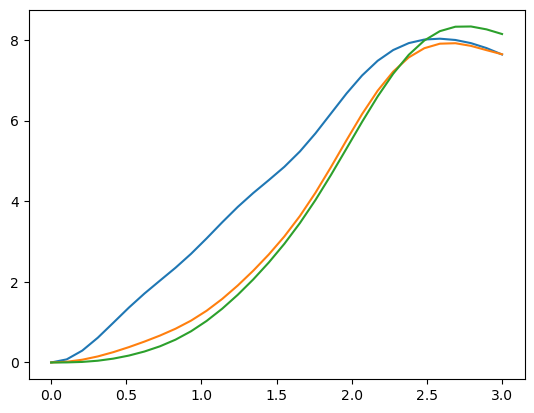

In [1]:
from qibo import hamiltonians
import numpy as np
from boostvqe.compiling_XXZ import *
from boostvqe.models.dbi.double_bracket_evolution_oracles import *

t = 0.01
steps = 3
delta=0.5
nqubits= 5

h_xxz = hamiltonians.XXZ(nqubits=nqubits, delta = delta)
h_xxz_sym = hamiltonians.XXZ(nqubits=nqubits, delta = delta, dense=False)
hsim_eo = SymbolicHamiltonian_EvolutionOracle.from_symbolic_hamiltonian(h_xxz_sym)

diff_norms = []
diff_norms_2nd_order = []
sym_ham = []

times = np.linspace(0,3,30)
for t in times:
    u = h_xxz.exp(t)
    circ = nqubit_XXZ_decomposition(nqubits=nqubits,t=t,delta=delta,steps=steps)
    diff_norms.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps)*circ.unitary()))
    circ = nqubit_XXZ_decomposition(nqubits=nqubits,t=t,delta=delta,steps=steps,order=2)
    diff_norms_2nd_order.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps, order = 2)*circ.unitary()))
    circ = hsim_circ = hsim_eo.circuit(t, steps)
    sym_ham.append(np.linalg.norm(u-vw_xxz_compiling_phase(nqubits,steps, order = 2)*circ.unitary()))

import matplotlib.pyplot as plt

plt.plot(times, diff_norms)
plt.plot(times, diff_norms_2nd_order)
plt.plot(times, sym_ham)

In [10]:
from boostvqe.models.dbi.group_commutator_iteration_transpiler import *
print("Effective number of layers from SymbolicHamiltonian:")
GroupCommutatorIterationWithEvolutionOracles.count_gates(circuit = hsim_circ,gate_type=gates.gates.CZ)/nqubits/steps

Effective number of layers:


6.0

In [13]:
circ = nqubit_XXZ_decomposition(nqubits=nqubits,t=t,delta=delta,steps=steps,order=2)
print("Effective number of layers from custom compiling:")
GroupCommutatorIterationWithEvolutionOracles.count_gates(circuit = circ,gate_type=gates.gates.CNOT)/nqubits/steps

Effective number of layers from custom compiling:


4.8